In [585]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from pylab import *


# %matplotlib inline
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

## 1. Решите линейную систему

$
\begin{bmatrix}
1 & 2 & 3\\ 
4 & 0 & 6\\ 
7 & 8 & 9
\end{bmatrix}\cdot X= \begin{bmatrix}
12\\ 
2\\ 
1
\end{bmatrix}
$

In [586]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

## 2. Найдите псевдорешение:

x + 2y – z = 1

3x – 4y = 7

8x – 5y + 2z = 12

2x – 5z = 7

11x +4y – 7z = 15


(переопределенная система)

In [587]:
A = np.array([[1, 2, -1],
              [3, -4, 0],
              [8, -5, 2],
              [2, -5, 0],
              [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B, rcond=None)

(array([ 1.15601029, -0.889718  , -0.85029782]),
 array([0.66772534]),
 3,
 array([14.89650167, 10.4695886 ,  2.73531577]))

In [588]:
# сверяем с вектором B
np.dot(A, [ 1.15601029, -0.889718  , -0.85029782])

array([ 0.22687211,  7.02690287, 11.99607668,  6.76061058, 15.10932593])

In [589]:
# вычислим невязку
np.dot(A, [ 1.15601029, -0.889718  , -0.85029782]) - B

array([-0.77312789,  0.02690287, -0.00392332, -0.23938942,  0.10932593])

In [590]:
# вычислим норму невязки
def Q(x, y, z):
    return ((np.linalg.norm(np.dot(A, [x, y, z]) - B))**2)
Q(1.15601029, -0.889718  , -0.85029782)

0.6677253445282124

## 3. Сколько решений имеет линейная система:

$
\begin{bmatrix}
1 & 2 & 3\\ 
4 & 5 & 6\\ 
7 & 8 & 9
\end{bmatrix}\cdot X= \begin{bmatrix}
12\\ 
2\\ 
1
\end{bmatrix}
$


Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 


In [591]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
B = np.array([[12, 2, 1]])

In [592]:
np.linalg.matrix_rank(A, 0.0001)

2

Ранг матрицы А = 2, а порядок матрицы = 3, т.е. определитель равен нулю

Получим расширенную матрицу:

In [593]:
C = np.concatenate((A, B.T), axis=1)
print(C)

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]


Посмотрим ранги матриц А и С

In [594]:
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

(2, 3)

Согласно теореме Кронекера-Капелли СЛАУ несовместна, так как ранг основной матрицы не равен рангу ее расширенной матрицы. Т.е. не имеет решений.

Изменим вектор B

In [595]:
B = np.array([[10, 11, 12]])

Проверим теперь ранги матриц А и С

In [596]:
C = np.concatenate((A, B.T), axis=1)
print(C)

[[ 1  2  3 10]
 [ 4  5  6 11]
 [ 7  8  9 12]]


In [597]:
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

(2, 2)

Теперь, согласно той же теореме Кронекера-Капелли СЛАУ совместна, и, так как ранг основной матрицы равен рангу ее расширенной матрицы, и ранг меньше числа неизвестных, то число решений у этой СЛАУ бесконечное множество.

## 4. Вычислите LU-разложение матрицы:

$
\begin{bmatrix}
1 & 2 & 3\\ 
2 & 16 & 21\\ 
4 & 28 & 73
\end{bmatrix}
$

In [598]:
A = np.array([[1, 2, 3],
              [2, 16, 21],
              [4, 28, 73]])
print(np.linalg.matrix_rank(A))
print(np.linalg.det(A))

3
432.00000000000017


In [599]:
P, L, U = scipy.linalg.lu(A)

print(P)
print(L)
print(U)

print()
print(np.dot(P, A) - np.dot(L, U))

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]

[[ -2. -12. -52.]
 [  3.  26.  70.]
 [ -1. -14. -18.]]


In [600]:
 np.linalg.det(A) == np.linalg.det(np.dot(L,U))

True

In [601]:
 np.linalg.det(A)

432.00000000000017

In [602]:
 np.linalg.det(np.dot(L,U))

432.00000000000017

**После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.**

Пусть вектор правых частей b будет такой

In [603]:
b = np.array([45, 31, 46])

**Решим систему уравнений**

In [604]:
x = np.linalg.solve(A, b)
x

array([55.3287037 , -3.67824074, -0.99074074])

**Теперь решим через LU разложение**

$
A\cdot \bar{x}=\bar{b}
$

$
L\cdot U\cdot \bar{x}=\bar{b}
$

$L\cdot \bar{y}=\bar{b}$

$U\cdot \bar{x} = \bar{y}$

#### решим систему

$L\cdot \bar{y}=\bar{b}$

In [605]:
y = np.linalg.solve(L, b)
y

array([45.  , 19.75, 31.4 ])

#### решим систему

$U\cdot \bar{x} = \bar{y}$

In [606]:
x = np.linalg.solve(U, y)
x

array([34.39351852,  0.4837963 , -1.4537037 ])

##### 5. Найдите нормальное псевдорешение недоопределенной системы:

$x + 2y – z = 1$

$8x – 5y + 2z = 12$

In [607]:
A = np.array([[1, 2, -1],
              [8, -5, 2]])
B = np.array([[1, 12]])

In [608]:
C = np.concatenate((A, B.T), axis=1)
print(C)

[[ 1  2 -1  1]
 [ 8 -5  2 12]]


In [609]:
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

(2, 2)

Согласно теореме Кронекера-Капелли система имеет бесконечное множество решений, так как ранг основной матрицы и ранг расширенной матрицы равны, и ранг меньше числа неизвестных.

Найдем точку на прямой, где перескаются плоскости

x = 0, тогда 2y - z = 1, -5y + 2z = 12

решим систему

In [610]:
A1 = np.array([[2, -1],
              [-5, 2]])
B1 = np.array([1, 12])
np.linalg.solve(A1, B1)

array([-14., -29.])

In [611]:
M = np.array([0, -14, -29])
M

array([  0, -14, -29])

Найдем векторное произведение векторов нормалей плоскостей

In [612]:
np.cross(A[0], A[1])

array([ -1, -10, -21])

Теперь у нас есть напрявляющий вектор и точка, составим уравнение прямой в пространстве, где пересекаются плоскости

$\frac{x}{-1}=\frac{y+14}{-10}=\frac{z+29}{-21}$

In [613]:
def Q(x, y):
    return (x**2 + y**2)

def f3(z):
    return ((10 * z + 290) / 21) - 14

def f2(y):
    return (y + 14) / 10 

def f1(x):
    return 21 * x - 29

x = np.linspace(-2, 3, 201)

X1 = np.ndarray((3,))

<IPython.core.display.Javascript object>


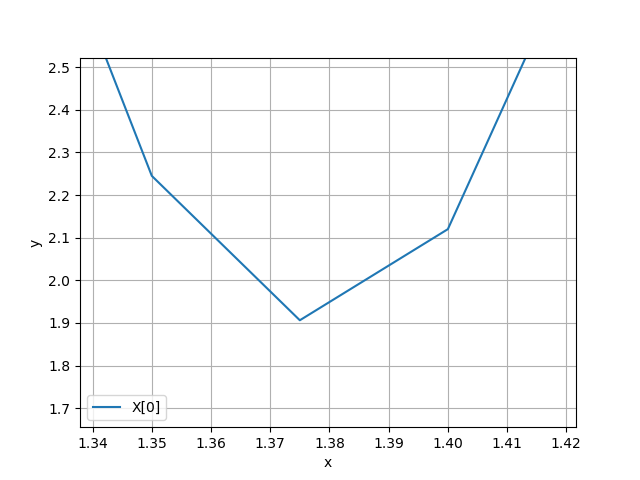

In [614]:
plt.close()
plt.plot( x, Q(x, f1(x)), label='X[0]')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

#### х (X[0]) ближе всего к нулевому вектору в точке ~ 1.375

In [615]:
X1[0] = 1.375

<IPython.core.display.Javascript object>


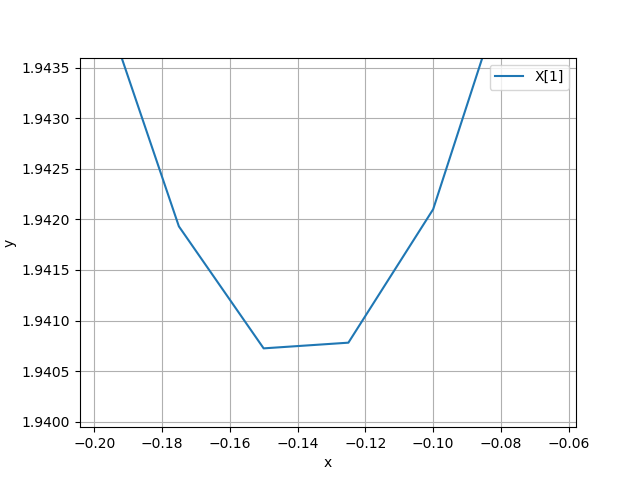

In [616]:
plt.close()
plt.plot( x, Q(x, f2(x)), label='X[1]')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

#### y (X[1]) ближе всего к нулевому вектору в точке ~ -0.14

In [617]:
X1[1] = -0.14

<IPython.core.display.Javascript object>


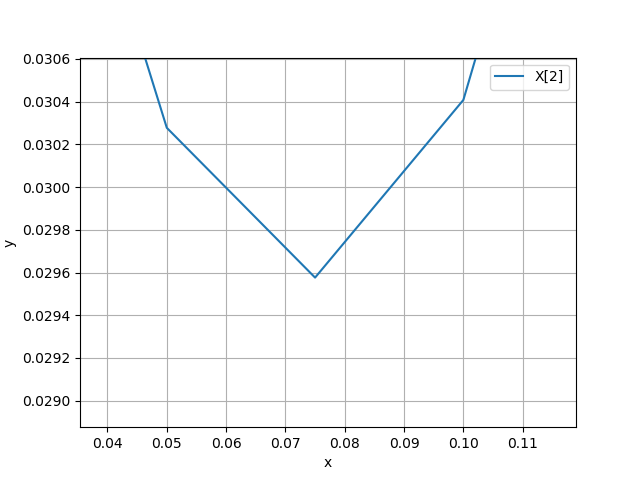

In [618]:
plt.close()
plt.plot( x, Q(x, f3(x)), label='X[2]')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

#### z (X[2]) ближе всего к нулевому вектору в точке ~ 0.075

In [619]:
X1[2] = 0.075

Проверим

In [620]:
X = np.linalg.lstsq(A, B.flatten(), rcond=-1)[0]
X

array([ 1.38191882, -0.18081181,  0.0202952 ])

Невязка

In [621]:
np.absolute(X) - np.absolute(X1)

array([ 0.00691882,  0.04081181, -0.0547048 ])

**ВЫВОД: Решение графическим способом совпадает с методом lstsq с небольшой невязкой**

## 6. Найдите одно из псевдорешений вырожденной системы:

$
\begin{bmatrix}
1 & 2 & 3\\ 
4 & 5 & 6\\ 
7 & 8 & 9
\end{bmatrix}\cdot X= \begin{bmatrix}
2\\ 
5\\ 
11
\end{bmatrix}
$

In [622]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
B = np.array([[2, 5, 11]])

Q, R = np.linalg.qr(A)

print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.77635684e-15]]


In [623]:
print(np.dot(Q, R))
print(np.round(np.dot(np.transpose(Q), Q)))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[ 1. -0. -0.]
 [-0.  1.  0.]
 [-0.  0.  1.]]


In [624]:
R1 = R[:2, :2]
R

array([[-8.12403840e+00, -9.60113630e+00, -1.10782342e+01],
       [ 0.00000000e+00,  9.04534034e-01,  1.80906807e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.77635684e-15]])

In [625]:
B1 = np.dot(np.transpose(Q), B.flatten())[:2]
B1

array([-1.21860576e+01,  8.43769499e-15])

In [626]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.32822279e-15])

Псевдорешение:

In [627]:
X = np.append(X1, 0)
print(X)

[1.50000000e+00 9.32822279e-15 0.00000000e+00]


In [628]:
np.linalg.norm(X)

1.4999999999999896

Невязка для найденного вектора Х:

In [629]:
np.linalg.norm(np.dot(A, X) - B)

1.2247448713915894

#### Попробуйте также отыскать и нормальное псевдорешение.

In [630]:
C = np.concatenate((A, B.T), axis=1)
print(C)

[[ 1  2  3  2]
 [ 4  5  6  5]
 [ 7  8  9 11]]


In [631]:
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

(2, 3)

СЛАУ несовместна. Поменяем вектор B

In [632]:
B = np.array([[10, 11, 12]])

In [633]:
C = np.concatenate((A, B.T), axis=1)
print(C)

[[ 1  2  3 10]
 [ 4  5  6 11]
 [ 7  8  9 12]]


In [634]:
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

(2, 2)

Теперь СЛАУ совместна и имеет бесконечное число решений. Найдем нормальное псевдорешение.

In [635]:
np.linalg.lstsq(A, B.flatten(), rcond=-1)[0]

array([-4.55555556,  0.11111111,  4.77777778])